# 🧱 Cấu trúc đề xuất cho đồ án: Supply Chain Big Data Analysis


## 1. 🎯 Giới thiệu dự án (Project Introduction)
- Mục tiêu: Dự đoán nguy cơ giao hàng trễ.
- Giới thiệu về bộ dữ liệu Supply Chain của DataCo Global.
- Ứng dụng thực tế của phân tích này.

## 2. 📊 Mô tả dữ liệu (Data Description)
- Thống kê số lượng dòng, cột.
- Kiểu dữ liệu của các cột.
- Giải thích ngắn gọn về ý nghĩa từng cột chính.

## 3. 📥 Nhập dữ liệu và thư viện (Importing Dataset and Libraries)
- Import thư viện (pandas, numpy, matplotlib, seaborn, scikit-learn, ...)
- Đọc dữ liệu từ file CSV.
- Hiển thị vài dòng đầu tiên của dữ liệu.

### 3.1. Thư viện sử dụng

In [1]:
# Thư viện phân tích dữ liệu
import pandas as pd
import numpy as np
import plotly.express as px

# Thư viện trực quan hóa
import seaborn as sns
import matplotlib.pyplot as plt

# Thư viện xử lý & xây dựng mô hình máy học
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, roc_curve, auc, classification_report

### 3.2. Tải và xem dữ liệu

In [2]:
# Đọc file CSV
df = pd.read_csv("DataCoSupplyChainDataset.csv", header=0, encoding='unicode_escape')

# Kích thước dữ liệu
print("Số dòng và cột:", df.shape)

# Xem trước 5 dòng đầu
df.head()


Số dòng và cột: (180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### 3.3.  Khám phá tổng quan dữ liệu

In [3]:
# Thông tin về kiểu dữ liệu từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
# Thống kê mô tả cho các biến số (min, max, mean, std...)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


## 4. 🧹 Tiền xử lý dữ liệu (Data Preprocessing)
- Kiểm tra và xử lý giá trị thiếu.
- Xử lý kiểu dữ liệu sai (dates, numbers, categories).
- Loại bỏ dữ liệu nhiễu, không cần thiết (nếu có).

### 4.1. Khám phá biến phân loại Shipping Mode

In [5]:
df['Shipping Mode'].unique()
df['Shipping Mode'].value_counts()


Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

### 4.2. Loại bỏ các cột không có giá trị phân biệt


- Các biến có số lượng giá trị duy nhất nhỏ hơn 2 sẽ không mang thông tin phân loại hoặc dự báo.

In [6]:
dfunique= df.nunique().sort_values(ascending= True, na_position='first')
dfunique.head()# Kiểm tra các biến có số lượng unique thấp

Product Description    0
Customer Password      1
Product Status         1
Customer Email         1
Late_delivery_risk     2
dtype: int64

In [7]:
df.drop(dfunique.index[np.where(dfunique < 2)], axis=1, inplace=True)

### 4.3. Phát hiện và xử lý phương sai thấp (low variance)

- Những thuộc tính có phương sai rất thấp có thể không đóng góp vào mô hình học máy.

In [8]:
df.select_dtypes(include='number').var().sort_values().head()

Order Item Discount Rate         0.004958
Order Item Profit Ratio          0.217898
Late_delivery_risk               0.247669
Days for shipment (scheduled)    1.889111
Order Item Quantity              2.112521
dtype: float64

### 4.4. Kiểm tra dữ liệu trùng lặp

In [9]:
df.duplicated().sum()


np.int64(0)

### 4.5. Xử lý giá trị thiếu (missing values)

In [10]:
dfna = df.isna().sum().sort_values(ascending=False)
dfna.head()


Order Zipcode               155679
Customer Lname                   8
Customer Zipcode                 3
Type                             0
Days for shipping (real)         0
dtype: int64

Bước 1: Loại bỏ các cột có số lượng giá trị thiếu quá nhiều (>50% dữ liệu):

In [11]:
df.drop(dfna.index[np.where(dfna > df.shape[0]/2)], axis=1, inplace=True)


Bước 2: Với các biến số, điền giá trị trung bình:

In [12]:
num = df.select_dtypes('number')
df[num.columns] = num.fillna(num.mean())


Bước 3: Với biến phân loại, điền bằng chuỗi trống:

In [13]:
df = df.fillna('')
df.isna().sum().sum()  # Kiểm tra lại tổng số NA


np.int64(0)

### 4.6. Xoá các cột không cần thiết (redundant or identifier columns)

In [14]:
df.drop(["Product Image", "Order Item Cardprod Id", "Order Item Id", "Product Card Id", 
         "Category Id", "Customer Country", "Customer State", "Customer Street", 
         "Department Id", "Customer Fname", "Order Item Discount", "Product Category Id"], 
        axis=1, inplace=True)


### 4.7. Phân tích tương quan để phát hiện đa cộng tuyến

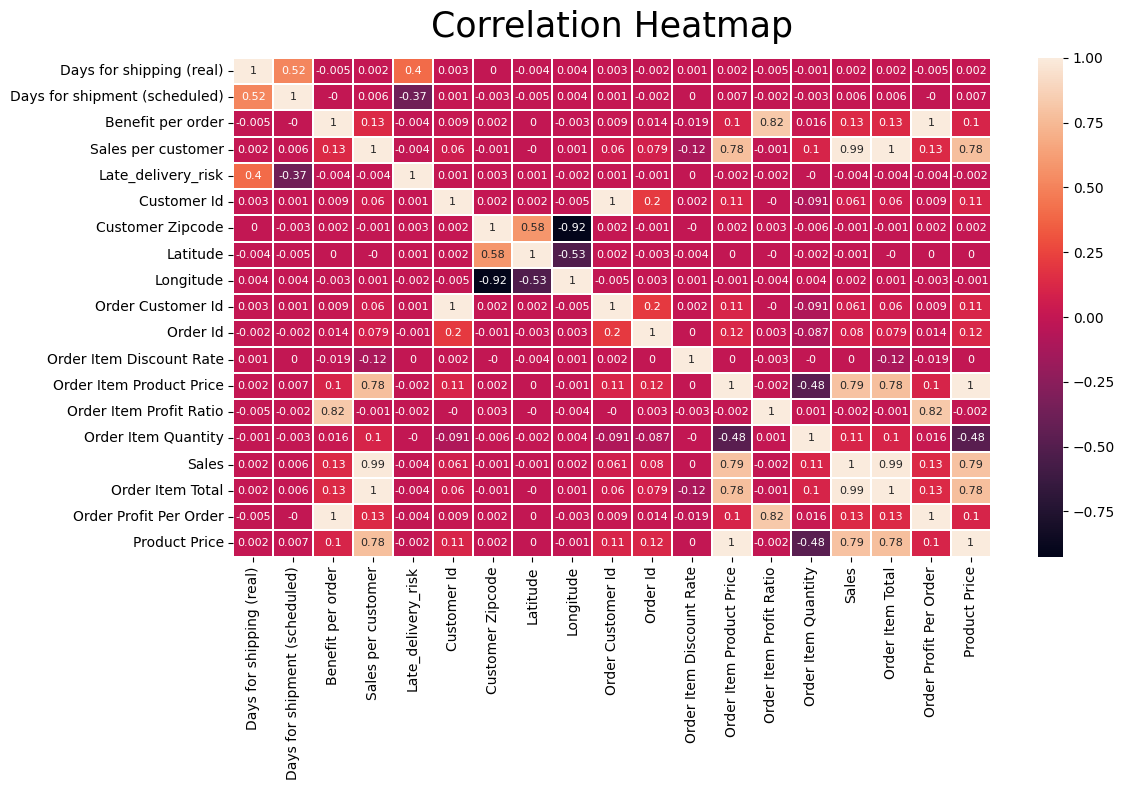

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(round(numeric_df.corr(), 3), annot=True, linewidths=0.1, annot_kws={"size": 8}, ax=ax)
plt.title('Correlation Heatmap', size=25, pad=15)
plt.tight_layout()
# plt.savefig('Correlation Heatmap.png', dpi=200)

- Phát hiện và xử lý đa cộng tuyến (Multicollinearity) bằng ma trận tương quan

In [16]:
# Chọn các biến số để tính toán tương quan
numeric_df = df.select_dtypes(include='number')

# Tính toán ma trận tương quan
corr_matrix = numeric_df.corr()

# Giữ lại phần tam giác trên (upper triangle) của ma trận tương quan
upper_corr_mat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Chuyển đổi từ dạng ma trận sang dạng Series 1 chiều, bỏ giá trị NaN
unique_corr_pairs = upper_corr_mat.unstack().dropna()

# Sắp xếp các cặp tương quan theo giá trị giảm dần
unique_corr_pairs.sort_values(ascending=False).head(10)


Order Customer Id        Customer Id                 1.000000
Product Price            Order Item Product Price    1.000000
Order Item Total         Sales per customer          1.000000
Order Profit Per Order   Benefit per order           1.000000
Sales                    Sales per customer          0.989744
Order Item Total         Sales                       0.989744
Order Item Profit Ratio  Benefit per order           0.823689
Order Profit Per Order   Order Item Profit Ratio     0.823689
Sales                    Order Item Product Price    0.789948
Product Price            Sales                       0.789948
dtype: float64

- Loại bỏ các biến có tương quan cao > 0.85

In [17]:
# Chuyển sang DataFrame để dễ xử lý
cortable = unique_corr_pairs.sort_values(ascending=False).reset_index()

# Xác định danh sách các cột cần loại bỏ do tương quan quá cao
drop_corr = cortable[cortable.iloc[:, 2] > 0.85]["level_1"].values.tolist()

drop_corr


['Customer Id',
 'Order Item Product Price',
 'Sales per customer',
 'Benefit per order',
 'Sales per customer',
 'Sales']

In [18]:
# Xoá các cột có tương quan cao khỏi dataframe
df.drop(drop_corr, axis=1, inplace=True)

- Kiểm tra lại kết quả sau khi loại bỏ

In [19]:
# Kích thước DataFrame sau khi xoá
print("Shape after dropping highly correlated columns:", df.shape)

# Danh sách các cột đã xoá
print("Dropped columns due to high correlation:", drop_corr)


Shape after dropping highly correlated columns: (180519, 31)
Dropped columns due to high correlation: ['Customer Id', 'Order Item Product Price', 'Sales per customer', 'Benefit per order', 'Sales per customer', 'Sales']


In [20]:
# Kiểm tra lại kiểu dữ liệu các cột
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Late_delivery_risk                 int64
Category Name                     object
Customer City                     object
Customer Lname                    object
Customer Segment                  object
Customer Zipcode                 float64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
order date (DateOrders)           object
Order Id                           int64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Order Region    

### 4.8. Cập nhật kiểu dữ liệu cho biến phân loại

In [21]:
col_types = {
    'Customer Lname':'category', 'Customer City':'category', 'Order State':'category',
    'Type':'category', 'Delivery Status':'category', 'Category Name':'category',
    'Customer Segment':'category', 'Department Name':'category', 'Market':'category',
    'Order Region':'category', 'Order Status':'category', 'Product Name':'category',
    'Shipping Mode':'category', 'Order City':'category', 'Order Country':'category'
}
df = df.astype(col_types)


### 4.9. Chuyển đổi kiểu dữ liệu ngày giờ

In [22]:
# Chuyển đổi cột ngày mà không cần 'infer_datetime_format'
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"])
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])




In [23]:
df.dtypes

Type                                   category
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Delivery Status                        category
Late_delivery_risk                        int64
Category Name                          category
Customer City                          category
Customer Lname                         category
Customer Segment                       category
Customer Zipcode                        float64
Department Name                        category
Latitude                                float64
Longitude                               float64
Market                                 category
Order City                             category
Order Country                          category
Order Customer Id                         int64
order date (DateOrders)          datetime64[ns]
Order Id                                  int64
Order Item Discount Rate                float64
Order Item Profit Ratio                 

## 5. 🔍 Phân tích dữ liệu khám phá (Exploratory Data Analysis - EDA)
- Trực quan hóa phân phối các biến.
- Tìm mối tương quan giữa các biến.
- Xem các yếu tố ảnh hưởng đến giao hàng trễ.

### 5.1. Phân tích doanh thu liên quan đến vấn đề giao hàng

#### Doanh thu theo đơn giao trễ và giao đúng hạn

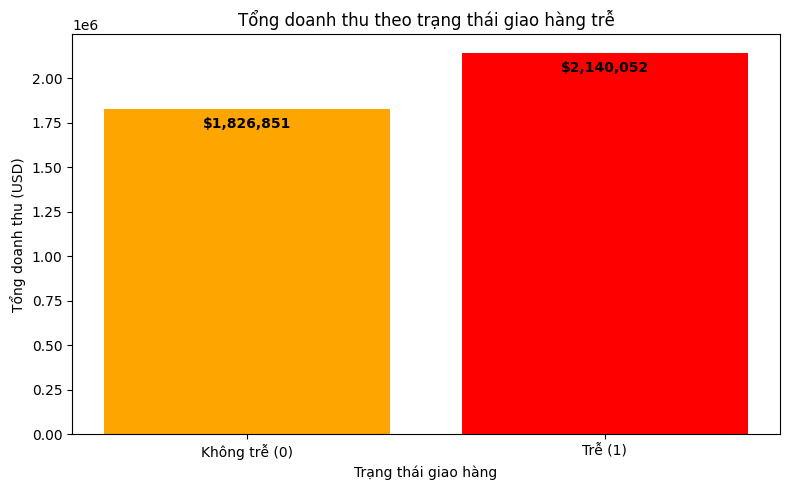

In [24]:


# Tính tổng lợi nhuận theo trạng thái giao hàng trễ
negative_revenue_by_delay = df.groupby('Late_delivery_risk')['Order Profit Per Order'].sum()

# Nhãn trục x
labels = ['Không trễ (0)', 'Trễ (1)']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(labels, negative_revenue_by_delay, color=['orange', 'red'])

# Thêm tiêu đề và nhãn
plt.title("Tổng doanh thu theo trạng thái giao hàng trễ")
plt.xlabel("Trạng thái giao hàng")
plt.ylabel("Tổng doanh thu (USD)")

# Hiển thị giá trị trên cột
for i, v in enumerate(negative_revenue_by_delay):
    plt.text(i, v - abs(max(negative_revenue_by_delay)) * 0.05, f"${v:,.0f}", ha='center', fontweight='bold', color='black')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Tổng doanh thu mất mát theo đơn giao trễ và giao đúng hạn

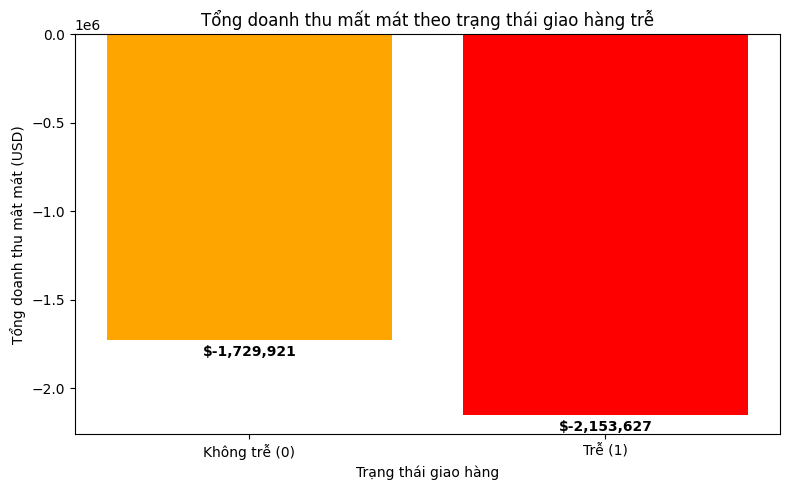

In [25]:


# Lọc những đơn hàng có lợi nhuận âm
df_negative = df[df['Order Profit Per Order'] < 0]

# Tính tổng lợi nhuận âm theo trạng thái giao hàng trễ
negative_revenue_by_delay = df_negative.groupby('Late_delivery_risk')['Order Profit Per Order'].sum()

# Nhãn trục x
labels = ['Không trễ (0)', 'Trễ (1)']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(labels, negative_revenue_by_delay, color=['orange', 'red'])

# Thêm tiêu đề và nhãn
plt.title("Tổng doanh thu mất mát theo trạng thái giao hàng trễ")
plt.xlabel("Trạng thái giao hàng")
plt.ylabel("Tổng doanh thu mât mát (USD)")

# Hiển thị giá trị trên cột
for i, v in enumerate(negative_revenue_by_delay):
    plt.text(i, v - abs(max(negative_revenue_by_delay)) * 0.05, f"${v:,.0f}", ha='center', fontweight='bold', color='black')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Tổng doanh thu theo Delivery Status

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\3124268627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  negative_revenue_by_status = df.groupby('Delivery Status')['Order Profit Per Order'].sum().sort_values()


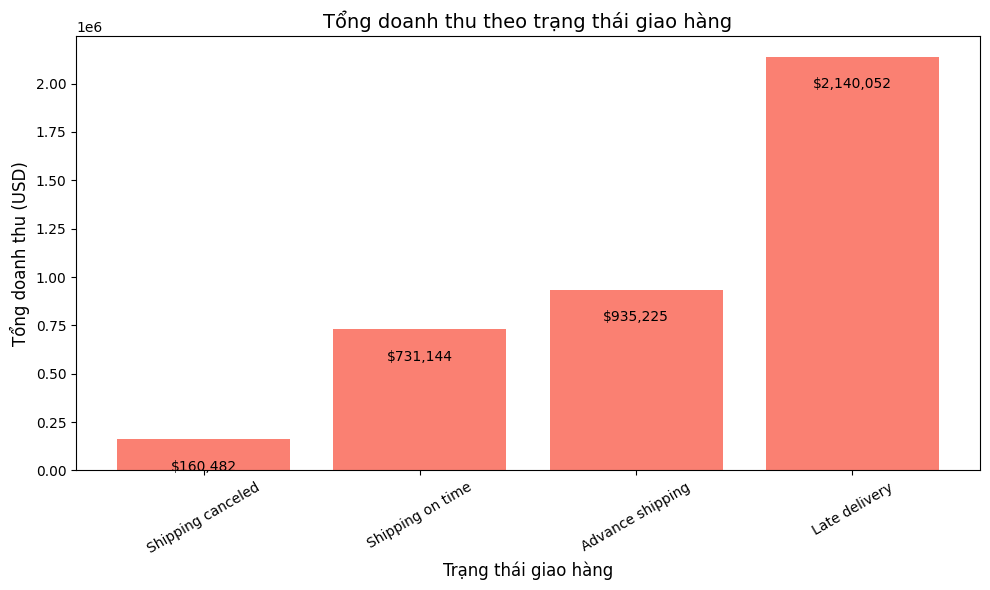

In [26]:

# Tính tổng doanh thu  theo trạng thái giao hàng
negative_revenue_by_status = df.groupby('Delivery Status')['Order Profit Per Order'].sum().sort_values()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(negative_revenue_by_status.index, negative_revenue_by_status.values, color='salmon')

# Thêm tiêu đề và nhãn
plt.title("Tổng doanh thu theo trạng thái giao hàng", fontsize=14)
plt.xlabel("Trạng thái giao hàng", fontsize=12)
plt.ylabel("Tổng doanh thu (USD)", fontsize=12)
plt.xticks(rotation=30)

# Hiển thị giá trị trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - abs(max(negative_revenue_by_status)) * 0.05,
             f"${height:,.0f}", ha='center', va='top', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Tổng doanh thu mất mát theo Delivery Status

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\3972806651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  negative_revenue_by_status = df_negative.groupby('Delivery Status')['Order Profit Per Order'].sum().sort_values()


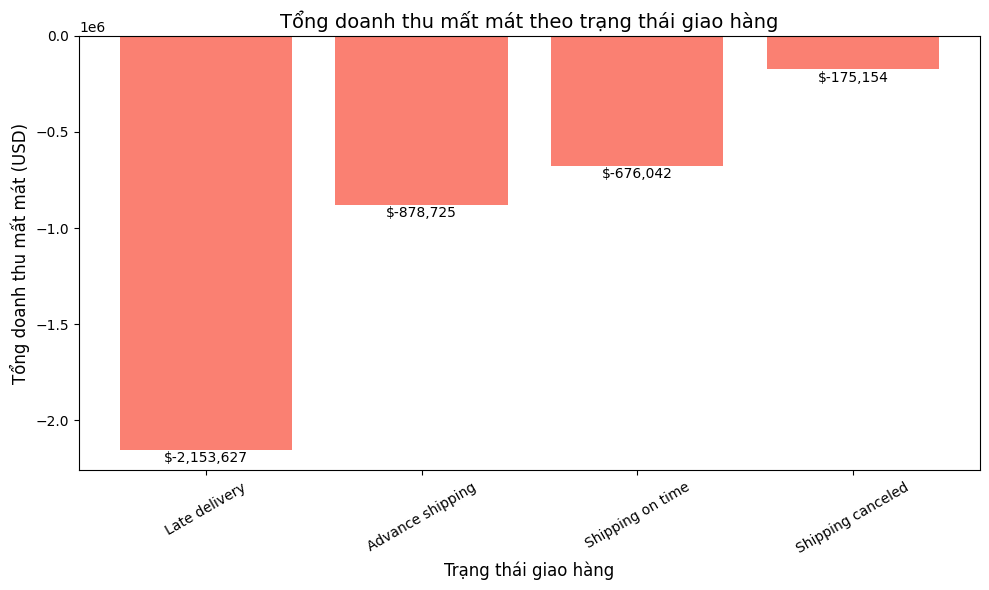

In [27]:

# Tính tổng doanh thu âm theo trạng thái giao hàng
negative_revenue_by_status = df_negative.groupby('Delivery Status')['Order Profit Per Order'].sum().sort_values()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(negative_revenue_by_status.index, negative_revenue_by_status.values, color='salmon')

# Thêm tiêu đề và nhãn
plt.title("Tổng doanh thu mất mát theo trạng thái giao hàng", fontsize=14)
plt.xlabel("Trạng thái giao hàng", fontsize=12)
plt.ylabel("Tổng doanh thu mất mát (USD)", fontsize=12)
plt.xticks(rotation=30)

# Hiển thị giá trị trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - abs(max(negative_revenue_by_status)) * 0.05,
             f"${height:,.0f}", ha='center', va='top', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Tổng doanh thu theo phương thức vận chuyển

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\1712059286.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  negative_revenue_by_shipping = df.groupby('Shipping Mode')['Order Profit Per Order'].sum().sort_values()


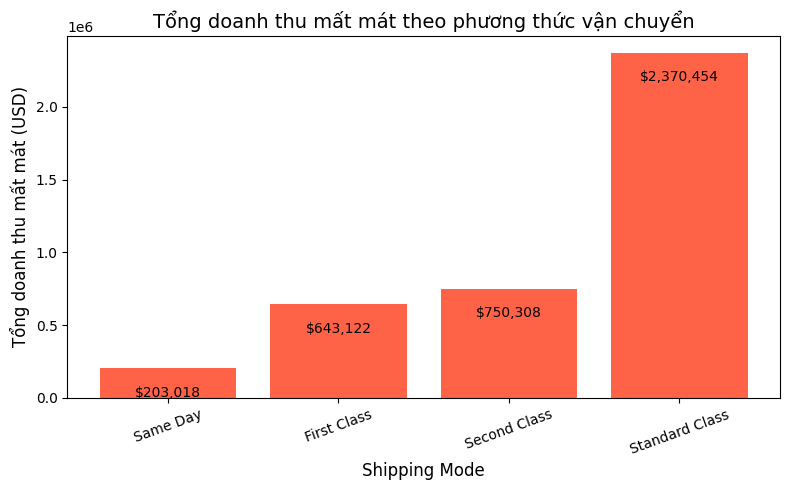

In [28]:


# Tính tổng doanh thu âm theo "Shipping Mode"
negative_revenue_by_shipping = df.groupby('Shipping Mode')['Order Profit Per Order'].sum().sort_values()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
bars = plt.bar(negative_revenue_by_shipping.index, negative_revenue_by_shipping.values, color='tomato')

# Thêm tiêu đề và nhãn
plt.title("Tổng doanh thu mất mát theo phương thức vận chuyển", fontsize=14)
plt.xlabel("Shipping Mode", fontsize=12)
plt.ylabel("Tổng doanh thu mất mát (USD)", fontsize=12)
plt.xticks(rotation=20)

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - abs(max(negative_revenue_by_shipping)) * 0.05,
             f"${height:,.0f}", ha='center', va='top', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Tổng doanh thu mất mát theo Shipping Mode

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\3211631226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  negative_revenue_by_shipping = df_negative.groupby('Shipping Mode')['Order Profit Per Order'].sum().sort_values()


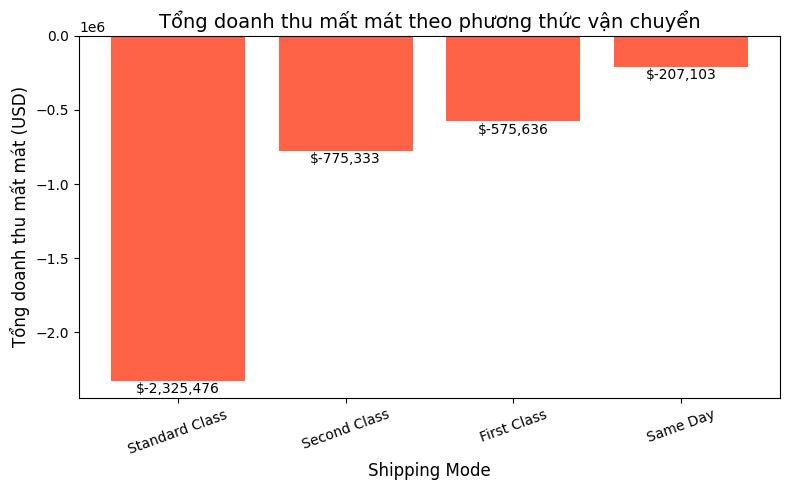

In [29]:


# Tính tổng doanh thu âm theo "Shipping Mode"
negative_revenue_by_shipping = df_negative.groupby('Shipping Mode')['Order Profit Per Order'].sum().sort_values()

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
bars = plt.bar(negative_revenue_by_shipping.index, negative_revenue_by_shipping.values, color='tomato')

# Thêm tiêu đề và nhãn
plt.title("Tổng doanh thu mất mát theo phương thức vận chuyển", fontsize=14)
plt.xlabel("Shipping Mode", fontsize=12)
plt.ylabel("Tổng doanh thu mất mát (USD)", fontsize=12)
plt.xticks(rotation=20)

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - abs(max(negative_revenue_by_shipping)) * 0.05,
             f"${height:,.0f}", ha='center', va='top', fontsize=10)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### Nhận xét chung cho 5.1 :

- Mặc dù lợi nhuận thu lại là có khi xét các biểu đồ doanh thu nhưng sự mất mát doanh thu cũng nhiều không kém cho thấy cần cải thiện thêm về lộ trình vận chuyển hay cần tạo ra một mô hình dự đoán đơn hàng nào sẽ bị trễ và ảnh hưởng đến doanh thu để có hướng giải quyết

### 5.2. Phân tích vận hành / giao hàng

#### Phân phối thời gian giao hàng thực tế so với lịch trình

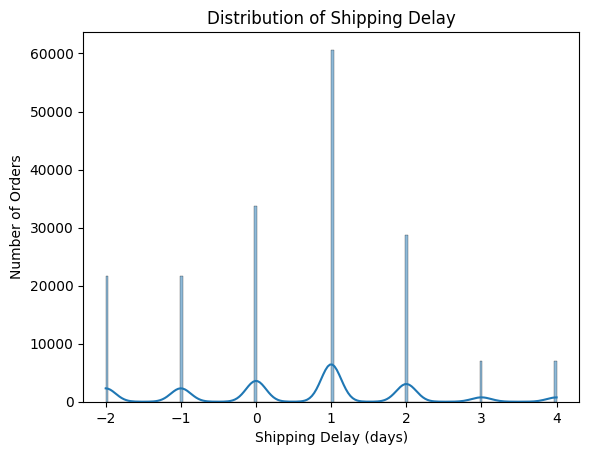

In [30]:
# Tạo cột Shipping Delay: số ngày chênh lệch giữa thời gian giao hàng thực tế và lịch trình
df['Shipping Delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# Vẽ biểu đồ histogram có đường KDE để quan sát phân phối độ trễ giao hàng
sns.histplot(df['Shipping Delay'], kde=True)
plt.xlabel('Shipping Delay (days)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Shipping Delay')
plt.show()


 🎯 Ý nghĩa: Phân phối này giúp hiểu độ trễ phổ biến khi giao hàng và xác định các khoảng thời gian có rủi ro cao.

#### Phân bố tỷ lệ các đơn hàng theo từng loại hình thức vận chuyển (Shipping Mode)

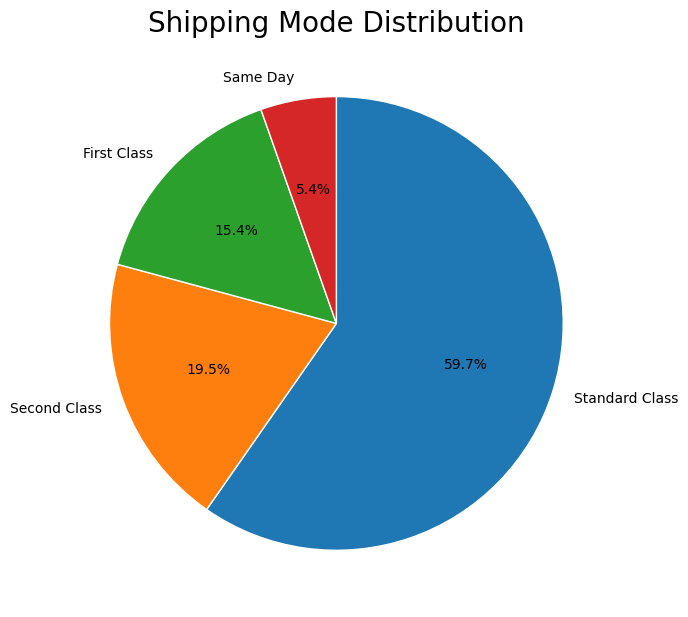

In [31]:
plt.subplots(figsize=(7,7))
plt.pie(df['Shipping Mode'].value_counts(),
    labels= dict(df['Shipping Mode'].value_counts()).keys(),
    autopct= '%1.1f%%',
    startangle= 90,
    counterclock=False,
    wedgeprops = {'edgecolor' : 'white'})
plt.title('Shipping Mode Distribution', size= 20)
plt.tight_layout()
#plt.savefig('shipping mode.png',dpi=200)
plt.show()


#### Tỷ lệ đơn hàng trễ theo Shipping Mode

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\4036893490.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_pct = df.groupby('Shipping Mode')['Late_delivery_risk'].mean().reset_index()


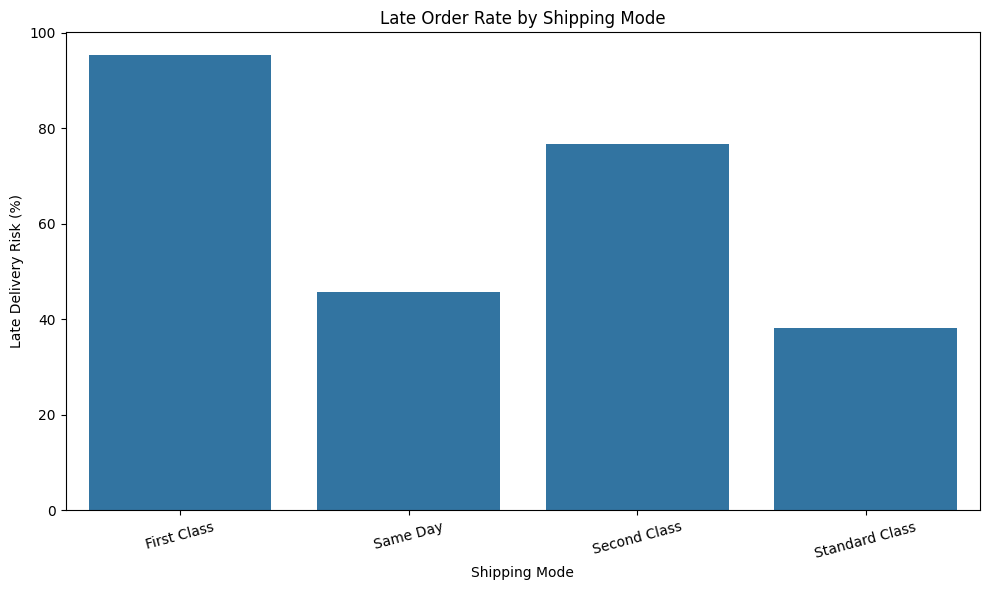

In [32]:
# Tính % đơn hàng giao trễ trên tổng số đơn theo từng hình thức vận chuyển
delay_pct = df.groupby('Shipping Mode')['Late_delivery_risk'].mean().reset_index()
delay_pct['Late_delivery_risk'] *= 100

# Vẽ biểu đồ thanh thể hiện % đơn hàng trễ
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping Mode', y='Late_delivery_risk', data=delay_pct)
plt.ylabel('Late Delivery Risk (%)')
plt.title('Late Order Rate by Shipping Mode')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


🎯 Ý nghĩa: Giúp xác định hình thức vận chuyển nào thường xuyên giao trễ hơn, phục vụ tối ưu logistics.

#### Số lượng đơn giao trễ vs đúng hạn theo Shipping Mode

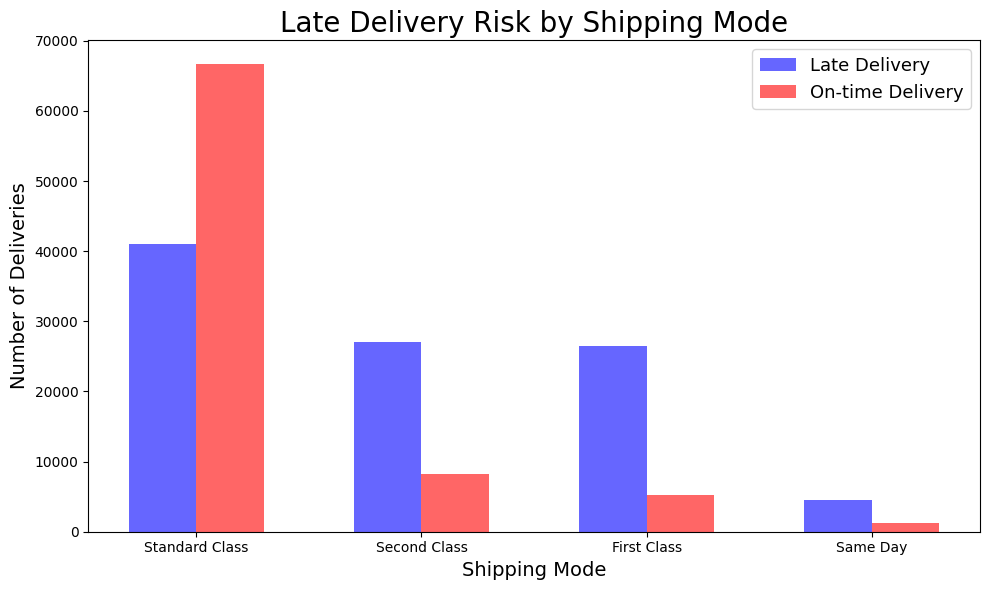

In [33]:
late = df[df['Late_delivery_risk'] == 1]
ontime = df[df['Late_delivery_risk'] == 0]
count1 = late['Shipping Mode'].value_counts()
count2 = ontime['Shipping Mode'].value_counts()
names = df['Shipping Mode'].value_counts().keys()

fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(names))
bar_width = 0.3
opacity = 0.6

type1 = plt.bar(index, count1, bar_width, alpha=opacity, color='b', label='Late Delivery')
type2 = plt.bar(index + bar_width, count2, bar_width, alpha=opacity, color='r', label='On-time Delivery')

plt.xlabel('Shipping Mode', fontsize=14)
plt.ylabel('Number of Deliveries', fontsize=14)
plt.title('Late Delivery Risk by Shipping Mode', fontsize=20)
plt.legend(fontsize=13)
plt.xticks(index + bar_width / 2, names)
plt.tight_layout()
#plt.savefig('late delivery risk - shipping mode.png',dpi=200)
plt.show()


🎯 Ý nghĩa: So sánh trực quan số đơn giao trễ và đúng hạn giữa các phương thức vận chuyển.

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\1271577190.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_deliveries_by_product = df.groupby(cate_col)[late_risk_col].sum().reset_index()
C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\1271577190.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


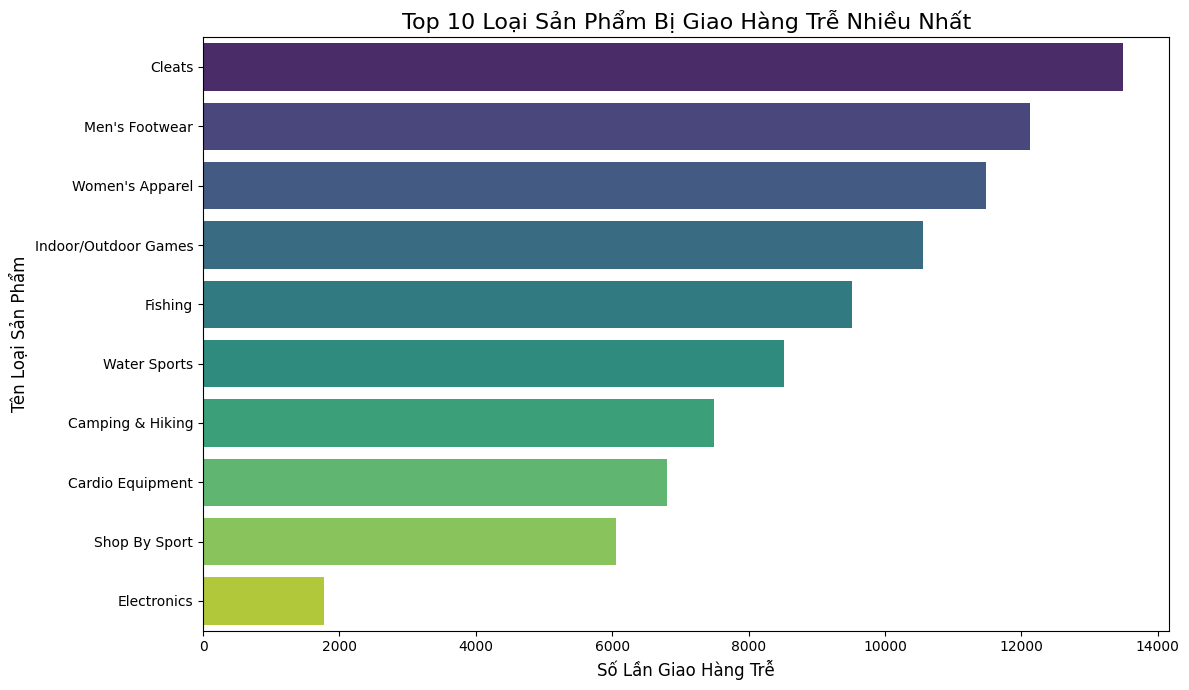

In [34]:
# Xác định tên cột 'Product Name' và 'Late_delivery_risk' trong DataFrame của bạn
cate_col = 'Category Name' # Thay thế nếu tên cột trong file khác
late_risk_col = 'Late_delivery_risk' # Thay thế nếu tên cột trong file khác

# Kiểm tra xem các cột cần thiết có tồn tại trong DataFrame không
if cate_col not in df.columns or late_risk_col not in df.columns:
    print(f"Lỗi: Không tìm thấy cột '{cate_col}' hoặc '{late_risk_col}' trong file dữ liệu.")
    print("Vui lòng kiểm tra lại tên cột và cập nhật biến 'product_col' và 'late_risk_col'.")
    exit()


# --- Bước 2: Tính tổng số lần trễ cho mỗi sản phẩm ---
# Group by 'Product Name' và tính tổng 'Late_delivery_risk' (vì 1 là trễ, tổng sẽ đếm số lần trễ)
late_deliveries_by_product = df.groupby(cate_col)[late_risk_col].sum().reset_index()
# --- Bước 3: Sắp xếp và chọn Top 10 ---
# Sắp xếp theo số lần trễ giảm dần
top_10_late_products = late_deliveries_by_product.sort_values(by=late_risk_col, ascending=False).head(10)
#display(top_10_late_products)
# --- Bước 4: Vẽ biểu đồ ---
plt.figure(figsize=(12, 7)) # Kích thước biểu đồ

sns.barplot(
    x=late_risk_col,
    y=cate_col,
    data=top_10_late_products,
    order=top_10_late_products.sort_values(by=late_risk_col, ascending=False)[cate_col],
    palette='viridis'
)

plt.title('Top 10 Loại Sản Phẩm Bị Giao Hàng Trễ Nhiều Nhất', fontsize=16)
plt.xlabel('Số Lần Giao Hàng Trễ', fontsize=12)
plt.ylabel('Tên Loại Sản Phẩm', fontsize=12)
plt.tight_layout()
plt.show()



In [35]:


# Bước 1: Lọc đơn hàng bị trễ
late_df = df[df['Late_delivery_risk'] == 1]

# Bước 2: Lấy Top 10 Category Name bị trễ nhiều nhất
top10_categories = late_df['Category Name'].value_counts().nlargest(10).index

# Bước 3: Với mỗi Category, tìm ngày giao hàng trễ nhiều nhất
results = []

for category in top10_categories:
    subset = late_df[late_df['Category Name'] == category]
    top_date = subset["shipping date (DateOrders)"].value_counts().idxmax()
    top_count = subset["shipping date (DateOrders)"].value_counts().max()
    results.append({
        'Category Name': category,
        'Top Late Shipping Date': top_date,
        'Late Orders on That Date': top_count
    })

# Chuyển kết quả thành DataFrame để xem đẹp hơn
result_df = pd.DataFrame(results)

# Hiển thị
print(result_df)


          Category Name Top Late Shipping Date  Late Orders on That Date
0                Cleats    2015-11-24 03:13:00                         5
1        Men's Footwear    2016-10-23 20:37:00                         4
2       Women's Apparel    2017-03-13 03:26:00                         6
3  Indoor/Outdoor Games    2017-04-07 08:07:00                         5
4               Fishing    2015-11-11 16:01:00                         4
5          Water Sports    2017-04-06 02:21:00                         4
6      Camping & Hiking    2015-04-15 05:38:00                         5
7      Cardio Equipment    2016-04-27 09:08:00                         4
8         Shop By Sport    2016-07-30 00:35:00                         4
9           Electronics    2017-04-09 10:45:00                         3


#### Phân tích lý do vì sao những loại sản phẩm này dễ bị giao trễ nhiều:
1. Cleats (Giày đinh thể thao)
Ngày trễ cao nhất: 2015-11-24

Lý do khả thi: Đây là sản phẩm thể thao mùa vụ, nhu cầu có thể tăng đột biến trong một số sự kiện hoặc mùa giải thể thao, gây áp lực cho kho và logistics.

2. Men's Footwear & Women's Apparel (Giày nam và thời trang nữ)
Ngày trễ cao nhất: khoảng đầu năm 2017 (tháng 3)

Lý do: Sản phẩm thời trang thường có biến động mùa vụ và các chương trình khuyến mãi lớn (ví dụ, xuân/hè hoặc giảm giá đầu năm), dẫn đến đơn hàng tăng đột biến, khiến việc giao hàng chậm trễ.

3. Indoor/Outdoor Games (Đồ chơi trong nhà/ngoài trời)
Ngày trễ cao nhất: 2017-04-07

Lý do: Đây là mặt hàng có kích thước cồng kềnh và đa dạng, đôi khi phụ thuộc vào nhập khẩu hoặc sản xuất theo mùa, dẫn đến tồn kho không ổn định và chậm trễ vận chuyển.

4. Fishing, Water Sports, Camping & Hiking (Đồ câu, thể thao nước, cắm trại & leo núi)
Ngày trễ cao nhất: trải dài từ 2015 đến 2016

Lý do: Các sản phẩm này thường có kích thước lớn, yêu cầu đóng gói và vận chuyển cẩn thận, dễ bị ảnh hưởng bởi điều kiện vận chuyển hoặc phụ thuộc vào các đối tác logistics chuyên biệt.

5. Cardio Equipment (Thiết bị tập thể dục)
Ngày trễ cao nhất: 2016-04-02

Lý do: Thiết bị thể dục cồng kềnh, nặng, đòi hỏi phương tiện vận chuyển chuyên dụng; thường xuyên bị trễ do hạn chế phương tiện hoặc thiếu hụt nhân lực bốc xếp.

6. Shop By Sport (Mua sắm theo thể thao)
Ngày trễ cao nhất: 2015-01-07

Lý do: Có thể đây là nhóm sản phẩm đa dạng, chứa nhiều loại hàng hoá khác nhau, nên dễ bị ảnh hưởng chung bởi các vấn đề về kho bãi và vận chuyển.

7. Electronics (Thiết bị điện tử)
Ngày trễ cao nhất: 2017-04-09

Lý do: Thiết bị điện tử có thể gặp trục trặc về tồn kho hoặc hải quan (nếu nhập khẩu), cùng với sự gia tăng đơn hàng theo mùa lễ, dễ gây ra tắc nghẽn trong chuỗi cung ứng.



#### Những nước  tương ứng với kho vận chuyển đến có tỷ lệ trễ cao nhất

In [36]:

# Lọc và loại bỏ giá trị thiếu
df_geo = df[['Order Country', 'Latitude', 'Longitude', 'Late_delivery_risk']].dropna()

# Làm tròn tọa độ đến 1 chữ số sau dấu phẩy (để giảm số lượng nhóm)
df_geo['Lat_round'] = df_geo['Latitude'].round(1)
df_geo['Long_round'] = df_geo['Longitude'].round(1)

# Nhóm theo Region + tọa độ đã làm tròn
region_group = df_geo.groupby(['Order Country', 'Lat_round', 'Long_round'])['Late_delivery_risk'] \
                     .agg(['count', 'sum']).reset_index()

# Tính tỷ lệ phần trăm đơn hàng giao trễ
region_group['Late Rate (%)'] = (region_group['sum'] / region_group['count']) * 100

# Lọc các cụm có số đơn hàng đủ lớn (ví dụ > 30)
region_group_filtered = region_group[region_group['count'] > 30]

# Lấy top 10 theo tỷ lệ trễ
top10_regions = region_group_filtered.sort_values(by='Late Rate (%)', ascending=False).head(10)

# In kết quả
display(top10_regions[['Order Country', 'Lat_round', 'Long_round', 'count', 'Late Rate (%)']])


C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\2237257331.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_group = df_geo.groupby(['Order Country', 'Lat_round', 'Long_round'])['Late_delivery_risk'] \


,Order Country,Lat_round,Long_round,count,Late Rate (%)
3694868,Estados Unidos,35.8,-77.5,32,87.500000
4077034,Francia,36.1,-115.2,45,86.666667
3698880,Estados Unidos,37.0,-122.0,35,85.714286
7828152,México,40.0,-75.2,35,85.714286
3204624,El Salvador,18.4,-66.1,41,85.365854
4067631,Francia,33.7,-118.0,34,85.294118
3719836,Estados Unidos,42.3,-83.4,36,83.333333
3666692,Estados Unidos,26.2,-80.2,59,83.050847
5319377,India,41.9,-87.7,34,82.352941
207184,Alemania,40.9,-73.9,48,81.250000


#### Các khu vực có tỷ lệ đơn hàng giao trễ rất cao đều nằm rải rác trên nhiều quốc gia và vùng địa lý khác nhau.

- Điều này có thể do các yếu tố như:

- Hạn chế về hạ tầng vận chuyển, đặc biệt trong các khu vực có địa hình khó hoặc vùng ngoại ô.

- Quản lý tồn kho và phân phối chưa hiệu quả, dẫn đến delay nhiều.

- Các yếu tố đặc thù vùng miền như điều kiện thời tiết, thủ tục hải quan phức tạp,...

#### Delivery Status phân bố theo vùng (Order Region)

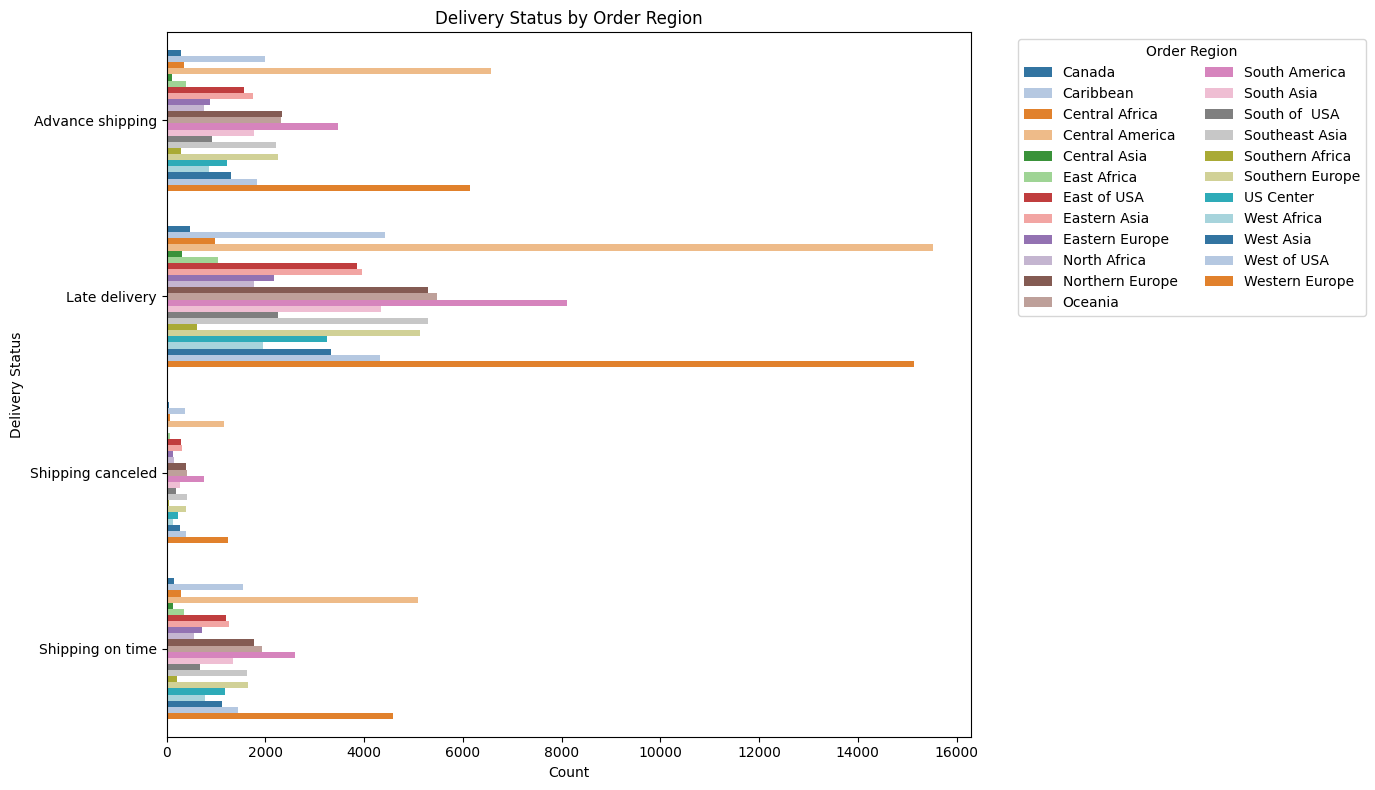

In [37]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(y='Delivery Status', hue='Order Region', data=df, palette='tab20')

# Tùy chỉnh legend để hiển thị gọn gàng
plt.legend(title='Order Region', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.title('Delivery Status by Order Region')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


## 6. 🧮 Biến đổi đặc trưng (Feature Engineering & Encoding)
- Tách các trường ngày giờ thành ngày, tháng, năm, ngày trong tuần...
- Mã hóa các biến phân loại (One-hot / Label Encoding).
- Feature selection (chọn các biến quan trọng).

### 6.1. Mã hóa các biến ngày tháng (Encoding Date Variables)

Đầu tiên, ta tách các biến ngày thành các thành phần cơ bản như năm, tháng, ngày, giờ, để mô hình có thể học được các xu hướng theo thời gian.

In [38]:
# Shipping date
df["ship_year"]= df["shipping date (DateOrders)"].dt.year
df["ship_month"]= df["shipping date (DateOrders)"].dt.month
df["ship_day"]= df["shipping date (DateOrders)"].dt.day
df["ship_hour"]= df["shipping date (DateOrders)"].dt.hour
df.drop(["shipping date (DateOrders)"], axis = 1, inplace= True)

# Order date
df["order_year"]= df["order date (DateOrders)"].dt.year
df["order_month"]= df["order date (DateOrders)"].dt.month
df["order_day"]= df["order date (DateOrders)"].dt.day
df["order_hour"]= df["order date (DateOrders)"].dt.hour
df.drop(["order date (DateOrders)"], axis = 1, inplace= True)


### 6.2 Khám phá đặc trưng số

Ta trực quan hóa các đặc trưng dạng số để kiểm tra phân phối và phát hiện outlier:

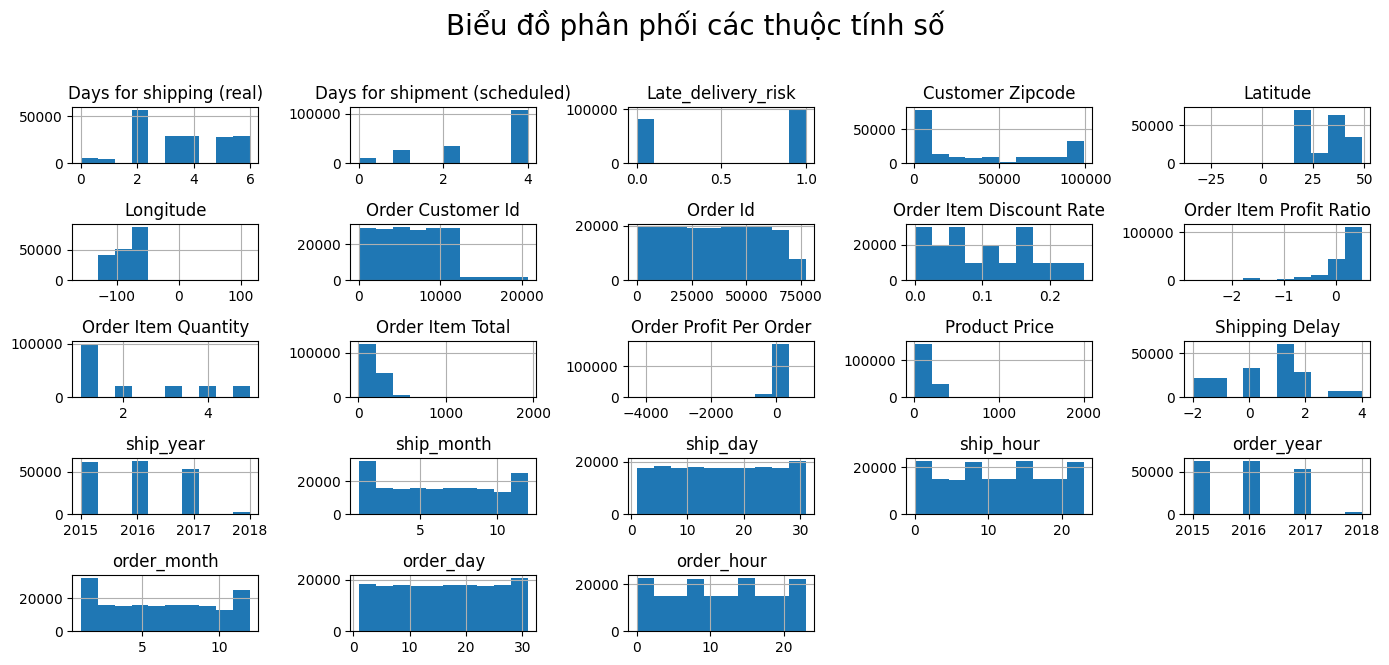

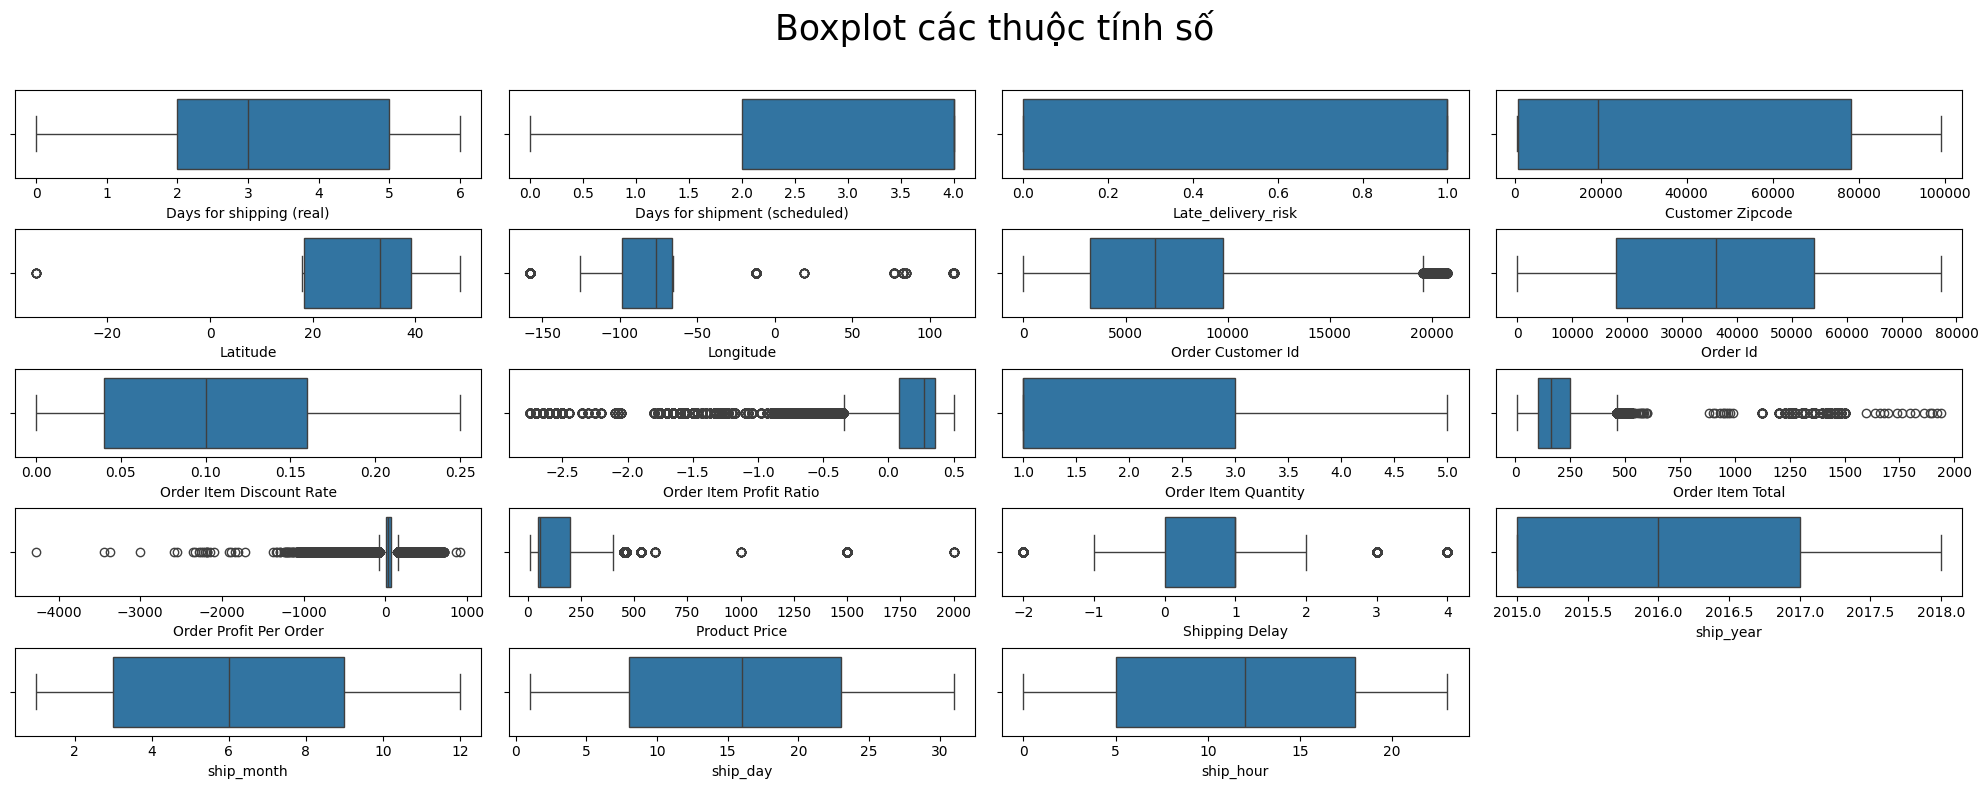

In [39]:
# Histogram
df.hist(figsize=(14,6))
plt.tight_layout()
plt.suptitle('Biểu đồ phân phối các thuộc tính số', size= 20, y= 1.1)
plt.show()

# Boxplot
fig, axes = plt.subplots(5,4,figsize=(20,8))
fig.delaxes(axes[4][3])  # Xóa ô trống
numdf= df.select_dtypes(exclude="category")
for attr, ax in zip(numdf.columns, axes.flatten()):
    sns.boxplot(x=attr, data=numdf, ax=ax)

plt.tight_layout()
fig.suptitle('Boxplot các thuộc tính số', size= 25) 
fig.subplots_adjust(top=0.88)
plt.show()


In [41]:
# Categorical Attributes
df.select_dtypes(include="category").columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Lname', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [42]:
# Numerical Attributes
df.select_dtypes(exclude="category").dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Late_delivery_risk                 int64
Customer Zipcode                 float64
Latitude                         float64
Longitude                        float64
Order Customer Id                  int64
Order Id                           int64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Product Price                    float64
Shipping Delay                     int64
ship_year                          int32
ship_month                         int32
ship_day                           int32
ship_hour                          int32
order_year                         int32
order_month                        int32
order_day                          int32
order_hour                         int32
dtype: object

### 6.3 Mã hóa các thuộc tính phân loại (Encoding Categorical Attributes)

Ta phân loại các thuộc tính dạng phân loại dựa trên số lượng giá trị duy nhất để chọn phương pháp mã hóa phù hợp:

In [43]:
unique_categorical = df.select_dtypes(include="category").nunique().sort_values()
unique_categorical


Customer Segment       3
Type                   4
Delivery Status        4
Shipping Mode          4
Market                 5
Order Status           9
Department Name       11
Order Region          23
Category Name         50
Product Name         118
Order Country        164
Customer City        563
Order State         1089
Customer Lname      1110
Order City          3597
dtype: int64

- One-Hot Encoding

Được sử dụng với các biến có ít hơn 8 giá trị duy nhất, tạo cột nhị phân cho mỗi giá trị.

In [44]:
dummydf = pd.get_dummies(df[list(unique_categorical.to_dict().keys())[:5]])
dummydf.head(3)


,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


In [45]:
dummydf.shape

(180519, 20)

In [46]:
df1= pd.concat([numdf, dummydf], axis =1)

- Label Encoding

Áp dụng cho các thuộc tính có nhiều hơn 8 giá trị, gán số thứ tự cho từng giá trị phân loại.

In [47]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x.astype(str))
    return x

In [48]:
label= list(unique_categorical.to_dict().keys())[5:]
labeldf=df[label].apply(Labelencoder_feature)

In [49]:
labeldf.head(3)

,Order Status,Department Name,Order Region,Category Name,Product Name,Order Country,Customer City,Order State,Customer Lname,Order City
0,2,4,15,40,78,70,66,475,483,331
1,5,4,13,40,78,69,66,841,616,391
2,1,4,13,40,78,69,452,841,627,391


In [50]:
df2= pd.concat([df1, labeldf], axis =1)

### 6.4 Loại bỏ các thuộc tính có tương quan cao (Feature Selection)

Trong bước này, ta sẽ loại bỏ các thuộc tính số có mối tương quan quá cao với nhau (hệ số tương quan > 0.85), để tránh hiện tượng đa cộng tuyến (multicollinearity), giúp mô hình học tốt hơn và tránh trùng lặp thông tin.

- Bước 1: Tính ma trận tương quan

In [51]:
# Tính hệ số tương quan Pearson giữa các cặp thuộc tính
upper_corr_mat1 = df2.corr().where(np.triu(np.ones(df2.corr().shape), k=1).astype(bool))


- Bước 2: Rút trích các cặp tương quan

In [52]:
# Lấy các cặp thuộc tính có giá trị tương quan khác NaN
unique_corr_pairs1 = upper_corr_mat1.unstack().dropna()

# Hiển thị 10 cặp thuộc tính tương quan cao nhất
unique_corr_pairs1.sort_values(ascending=False).head(10)


Delivery Status_Late delivery  Late_delivery_risk               1.000000
order_year                     ship_year                        0.994073
order_month                    ship_month                       0.952179
Shipping Mode_Standard Class   Days for shipment (scheduled)    0.945696
ship_year                      Order Id                         0.942353
order_year                     Order Id                         0.941952
order_hour                     ship_hour                        0.918932
Order Profit Per Order         Order Item Profit Ratio          0.823689
Product Price                  Order Item Total                 0.781781
Delivery Status_Late delivery  Shipping Delay                   0.777644
dtype: float64

- Bước 3: Lọc các thuộc tính có tương quan > 0.85

In [53]:
# Chuyển về bảng và lọc ra các thuộc tính có tương quan vượt ngưỡng 0.85
cortable1 = unique_corr_pairs1.sort_values(ascending=False).reset_index()
drop_corr1 = cortable1[cortable1.iloc[:,2] > 0.85]["level_0"].values.tolist()
drop_corr1  # Danh sách thuộc tính cần loại bỏ


['Delivery Status_Late delivery',
 'order_year',
 'order_month',
 'Shipping Mode_Standard Class',
 'ship_year',
 'order_year',
 'order_hour']

- Bước 4: Loại bỏ các thuộc tính tương quan cao

In [54]:
# Xóa các thuộc tính tương quan cao khỏi tập dữ liệu
df2.drop(drop_corr1, axis=1, inplace=True)
df2.shape  # Kiểm tra kích thước dữ liệu sau khi loại bỏ


(180519, 47)

✅ Kết quả: Dataset đã được loại bỏ các biến dư thừa, giảm nhiễu và chuẩn bị cho bước tiếp theo: Xây dựng mô hình học máy.

## 7. 🤖 Xây dựng mô hình học máy (Machine Learning Models)
- Chia dữ liệu train/test.
- Dự đoán biến mục tiêu Late_delivery_risk (0/1).
- Áp dụng các mô hình phân loại và đánh giá hiệu quả dựa trên nhiều phương pháp chia tập dữ liệu

### 7.1. Chia dữ liệu train/test và chuẩn hóa

In [55]:
# Bước 1: Tách biến mục tiêu (y) và tập thuộc tính đầu vào (X)
X = df2.drop(["Late_delivery_risk"], axis=1)

# Loại bỏ các cột bắt đầu bằng "Delivery" để tránh dữ liệu bị rò rỉ (data leakage)
X = X.loc[:, ~X.columns.str.startswith('Delivery')]

# Gán biến mục tiêu
y = df2["Late_delivery_risk"]

# Bước 2: Chia dữ liệu thành tập huấn luyện và kiểm tra với tỷ lệ 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Bước 3: Chuẩn hóa dữ liệu bằng StandardScaler (giúp mô hình học hiệu quả hơn)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### 7.2. Huấn luyện và đánh giá các mô hình phân loại

In [56]:
# Khởi tạo danh sách các mô hình phân loại
classifiers = [
    KNeighborsClassifier(),       # K-Nearest Neighbors
    LogisticRegression(),         # Hồi quy logistic
    GaussianNB()                # Naive Bayes
   
]

# Danh sách tên tương ứng của các mô hình
model_names = ["KNN", "Logistic Regression", "Naive Bayes"]



### 7.3. Đánh giá mô hình với nhiều phương pháp chia dữ liệu

In [57]:
# 1. Đánh giá với train/test split cố định
accuracy_results_1 = []
for clf in classifiers:
    # Huấn luyện mô hình và dự đoán trên tập test
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results_1.append(round(acc * 100, 2))

In [58]:
# 2. KFold Cross Validation (chia tập dữ liệu thành 5 phần đều nhau)
accuracy_results_2 = []
for clf in classifiers:
    pipe = make_pipeline(StandardScaler(), clf)
    acc = np.mean(cross_val_score(pipe, X, y, scoring="accuracy", cv=KFold(), n_jobs=-1))
    accuracy_results_2.append(round(acc * 100, 2))

In [59]:
# 3. StratifiedKFold giữ nguyên tỷ lệ các lớp trong mỗi fold
accuracy_results_3 = []
for clf in classifiers:
    pipe = make_pipeline(StandardScaler(), clf)
    acc = np.mean(cross_val_score(pipe, X, y, scoring="accuracy", cv=StratifiedKFold(), n_jobs=-1))
    accuracy_results_3.append(round(acc * 100, 2))


In [60]:

# 4. ShuffleSplit chia ngẫu nhiên 5 lần, mỗi lần lấy 70% làm train, 30% test
accuracy_results_4 = []
for clf in classifiers:
    pipe = make_pipeline(StandardScaler(), clf)
    acc = np.mean(cross_val_score(pipe, X, y, scoring="accuracy", cv=ShuffleSplit(n_splits=5, test_size=0.3), n_jobs=-1))
    accuracy_results_4.append(round(acc * 100, 2))


##### Tổng hợp kết quả đánh giá

In [61]:
# Tạo DataFrame để so sánh độ chính xác của các mô hình
eval_frame = pd.DataFrame({
    'Model': model_names,
    'Train/Test Split': accuracy_results_1,
    'KFold (5)': accuracy_results_2,
    'StratifiedKFold (5)': accuracy_results_3,
    'ShuffleSplit': accuracy_results_4
})

# Tính độ chính xác trung bình
eval_frame['Average Accuracy'] = eval_frame.iloc[:, 1:].mean(axis=1)

# Hiển thị bảng kết quả
eval_frame.sort_values('Average Accuracy', ascending=False)


,Model,Train/Test Split,KFold (5),StratifiedKFold (5),ShuffleSplit,Average Accuracy
1,Logistic Regression,97.50,97.55,97.37,97.53,97.4875
0,KNN,91.68,90.61,89.09,91.58,90.7400
2,Naive Bayes,90.29,91.02,90.89,90.37,90.6425


### 7.4. Mô hình tốt nhất: Logistic Regression

In [62]:
# Dựa vào độ chính xác trung bình, ta chọn Logistic Regression làm mô hình tốt nhất
best_classifier = LogisticRegression()

# Huấn luyện và dự đoán
y_pred = best_classifier.fit(X_train, y_train).predict(X_test)

# In báo cáo chi tiết các chỉ số: precision, recall, f1-score
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.98      0.96      0.97     20396
           1       0.97      0.99      0.98     24734

    accuracy                           0.98     45130
   macro avg       0.98      0.97      0.97     45130
weighted avg       0.98      0.98      0.98     45130



### 7.5. Trực quan hóa Confusion Matrix và ROC Curve

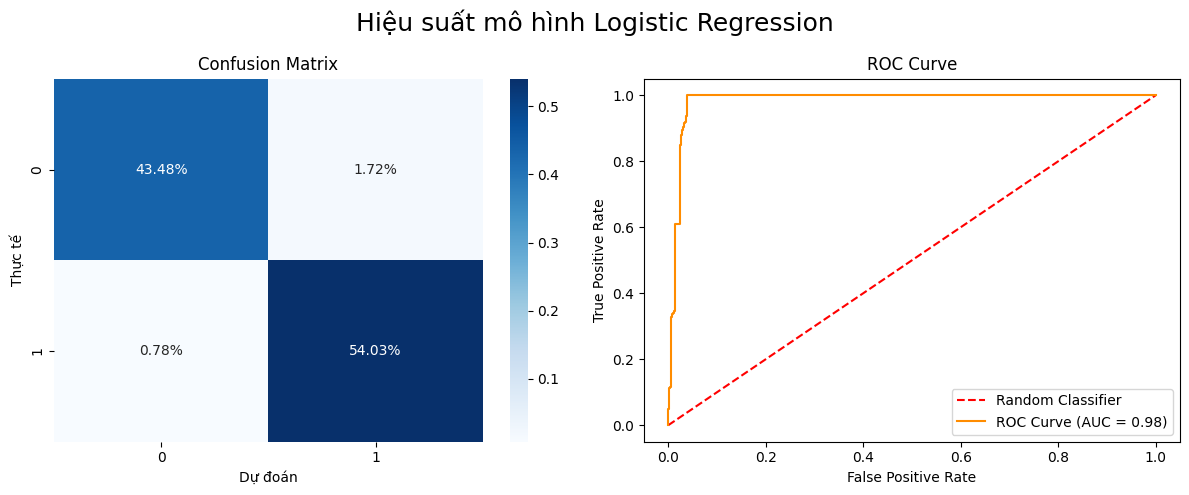

In [63]:
# Confusion matrix: ma trận nhầm lẫn
cf_matrix = confusion_matrix(y_test, y_pred)

# Lấy xác suất dự đoán để vẽ đường ROC
y_probs = best_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Hiệu suất mô hình Logistic Regression", fontsize=18)

# Biểu đồ Confusion Matrix
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Dự đoán')
ax1.set_ylabel('Thực tế')

# Biểu đồ ROC Curve
ax2.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()


## 8. 🧠 Dự đoán và phân tích kết quả (Late Delivery Prediction)
- Dự đoán nhãn Late_delivery_risk.
- Phân tích các đặc trưng ảnh hưởng nhiều nhất.
- Hiển thị kết quả trực quan bằng biểu đồ.

### 8.1. Dự đoán nhãn giao hàng trễ bằng mô hình Logistic Regression

In [64]:
# Dự đoán nhãn 0/1: Có rủi ro giao hàng trễ hay không
pred = best_classifier.predict(X_test)

# Chuyển kết quả dự đoán sang DataFrame để tiện hiển thị
prediction = pd.DataFrame(pred, columns=['Late Delivery Risk'])

# Xem trước 5 kết quả đầu tiên
prediction.head()


,Late Delivery Risk
0,1
1,1
2,0
3,1
4,0


🔍 Giải thích: Giá trị 1 nghĩa là đơn hàng có nguy cơ giao hàng trễ, còn 0 là không có nguy cơ trễ.

### 8.2. Phân tích mức độ ảnh hưởng của các đặc trưng đến rủi ro giao hàng trễ

In [65]:
# Trích xuất hệ số của các đặc trưng từ Logistic Regression
feature_importance = best_classifier.coef_[0]

# Tạo DataFrame hiển thị tên đặc trưng và độ quan trọng
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sắp xếp theo độ lớn tuyệt đối của hệ số (trọng số)
importance_df = importance_df.reindex(
    importance_df['Importance'].abs().sort_values(ascending=False).index
)

# Lọc ra các đặc trưng có ảnh hưởng đáng kể (|hệ số| >= 0.05)
filtered_importance_df = importance_df[
    importance_df['Importance'].abs() >= 0.05
]

# Sắp xếp lại cho biểu đồ dễ nhìn
filtered_importance_df = filtered_importance_df.reindex(
    filtered_importance_df['Importance'].abs().sort_values(ascending=True).index
)

# Hiển thị bảng đặc trưng quan trọng
filtered_importance_df


,Feature,Importance
16,ship_hour,-0.133717
23,Type_PAYMENT,-0.227362
27,Shipping Mode_Second Class,0.300592
26,Shipping Mode_Same Day,0.559744
21,Type_CASH,0.674576
22,Type_DEBIT,0.751421
24,Type_TRANSFER,-1.073411
33,Order Status,1.252290
25,Shipping Mode_First Class,1.296709
1,Days for shipment (scheduled),-1.563693


### 8.3. Trực quan hóa các đặc trưng có ảnh hưởng mạnh nhất

C:\Users\maiho\AppData\Local\Temp\ipykernel_10552\780612210.py:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\maiho\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


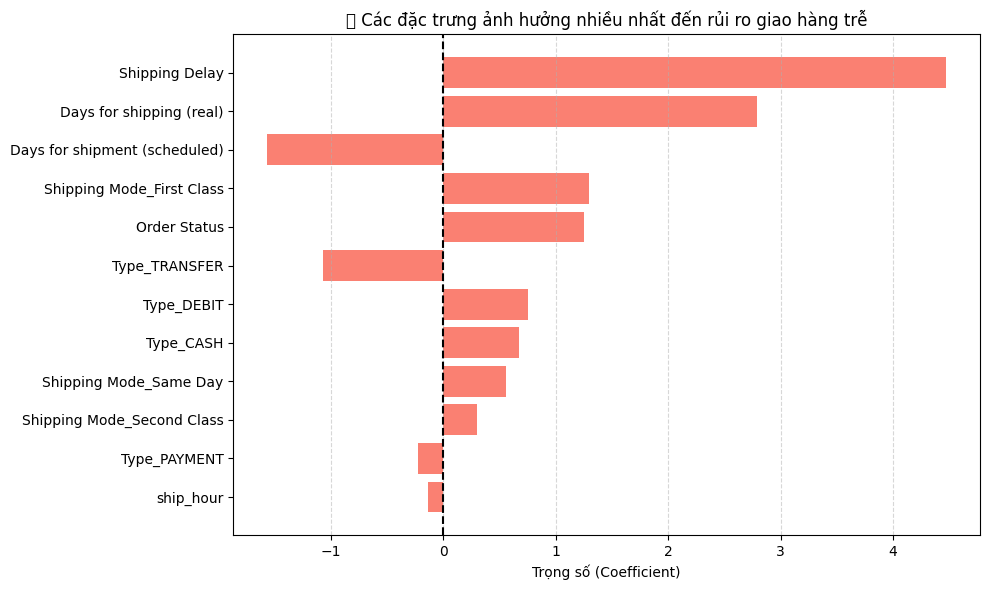

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(
    filtered_importance_df['Feature'],
    filtered_importance_df['Importance'],
    color='salmon'
)
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Trọng số (Coefficient)')
plt.title('🎯 Các đặc trưng ảnh hưởng nhiều nhất đến rủi ro giao hàng trễ')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


✅ Diễn giải kết quả (Data Storytelling)

Các đặc trưng có hệ số âm làm giảm nguy cơ giao hàng trễ.

Các đặc trưng có hệ số dương làm tăng nguy cơ giao hàng trễ.

Trong kết quả, các yếu tố như Shipping_Mode, Weight_in_gms, Product_importance có hệ số lớn, cho thấy đây là các yếu tố quyết định đáng kể.

Shipping Mode thường là yếu tố then chốt: nếu chọn hình thức giao hàng nhanh hơn thì rủi ro trễ sẽ giảm đáng kể.

## 9. 📋 Kết luận (Conclusion & Recommendations)
- Tóm tắt phát hiện chính.
- Gợi ý hướng cải tiến quy trình giao hàng.
- Đề xuất hướng phát triển mở rộng.